<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW_3_I_hope_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
require(readxl)
install.packages('skimr')
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages("lsr")
library(lsr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
install.packages("effsize")
library(effsize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following object is masked from ‘package:effsize’:

    cohen.d


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
meta <- read_xlsx("/content/sample_data/metadata.xlsx",sheet = 1)
hdl <- read_tsv("/content/sample_data/high_density_lipids.tsv")
ldl <- read_tsv("/content/sample_data/low_density_lipids.tsv")

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


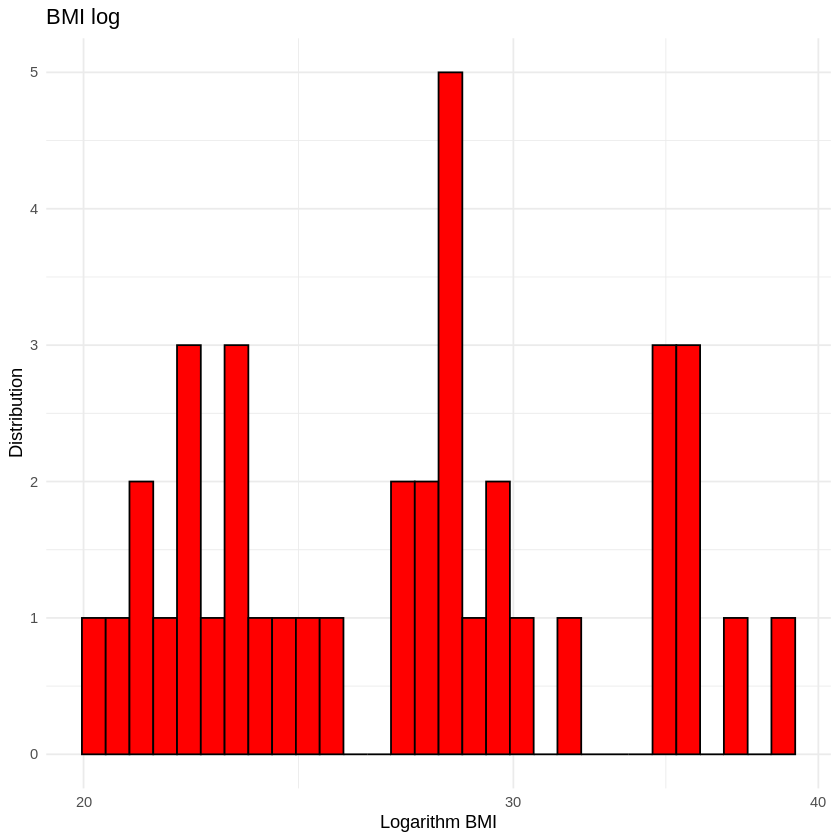

In [4]:
ggplot(meta,aes(BMI)) +
  geom_histogram(color = 'black',fill = 'red') +
  ggtitle('BMI log')+
  scale_x_log10('Logarithm BMI') +
  scale_y_continuous('Distribution') +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


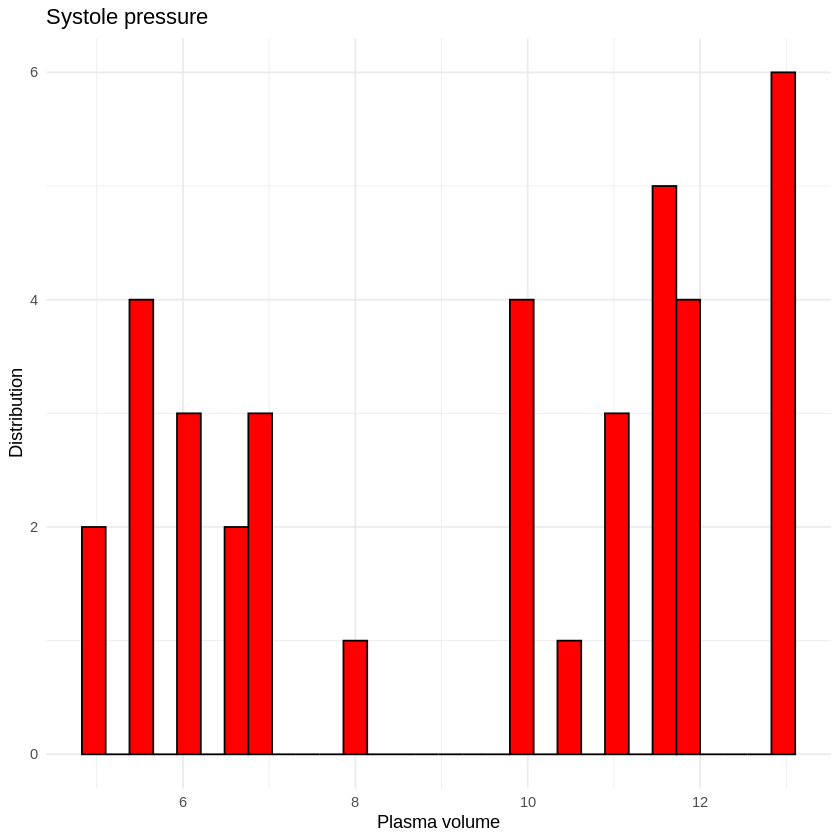

In [5]:
ggplot(meta,aes(`Plasma volume`)) +
  geom_histogram(color = 'black',fill = 'red') +
  ggtitle('Systole pressure')+
  scale_alpha_continuous('Logarithm Plasma volume') +
  scale_y_continuous('Distribution') +
  theme_minimal()

In [6]:
meta%>%
  mutate(norm_bmi = log10(BMI)) %>%
  t.test(norm_bmi ~ HT, data = .)


	Welch Two Sample t-test

data:  norm_bmi by HT
t = -2.8965, df = 35.016, p-value = 0.006465
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.11568971 -0.02034516
sample estimates:
mean in group 0 mean in group 1 
       1.391441        1.459458 


In [11]:
meta %>%
  mutate(norm_bmi = log10(BMI)) %>%
  lsr::cohensD(data = .,formula = norm_bmi ~ HT)
#размер эффекта большая

[1] 0.9075258

In [14]:
meta %>%
  mutate(norm_bmi = log10(BMI)) %>%
  effsize::cohen.d(formula = norm_bmi ~ HT, data = .)

Warning message in cohen.d.formula(formula = norm_bmi ~ HT, data = .):
“Cohercing rhs of formula to factor”



Cohen's d

d estimate: -0.9075258 (large)
95 percent confidence interval:
     lower      upper 
-1.6129463 -0.2021052 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


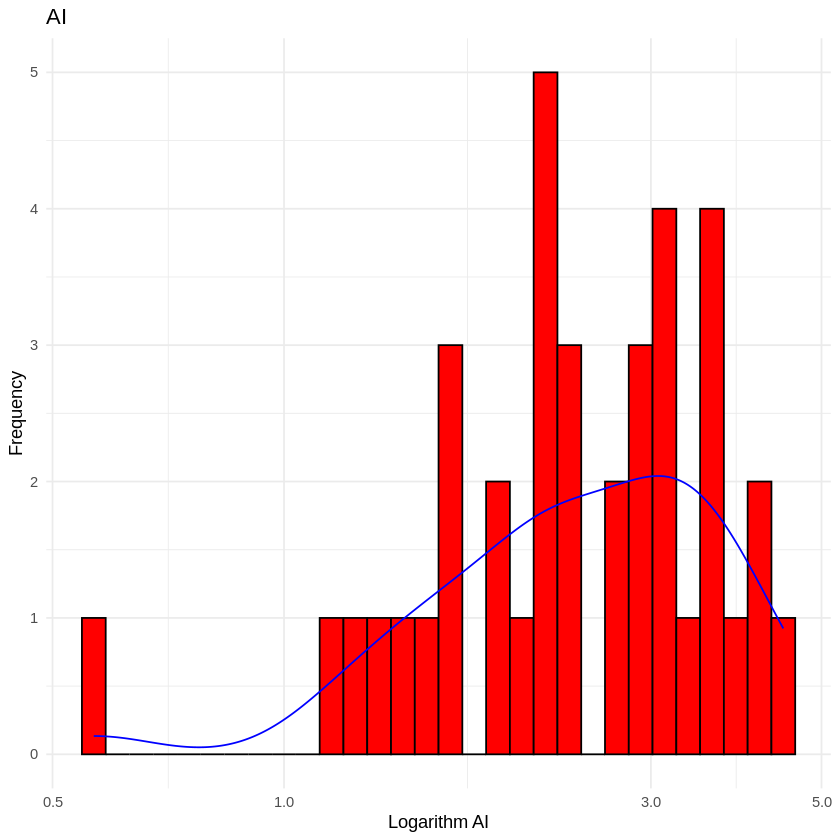

In [15]:
ggplot(meta,aes(AI)) +
  geom_histogram(color = 'black',fill = 'red') +
  geom_density(color = 'blue') +
  ggtitle('AI')+
  scale_x_log10('Logarithm AI') +
  scale_y_continuous(name = 'Frequency') +
  theme_minimal()
  #facet_grid(rows = var())

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


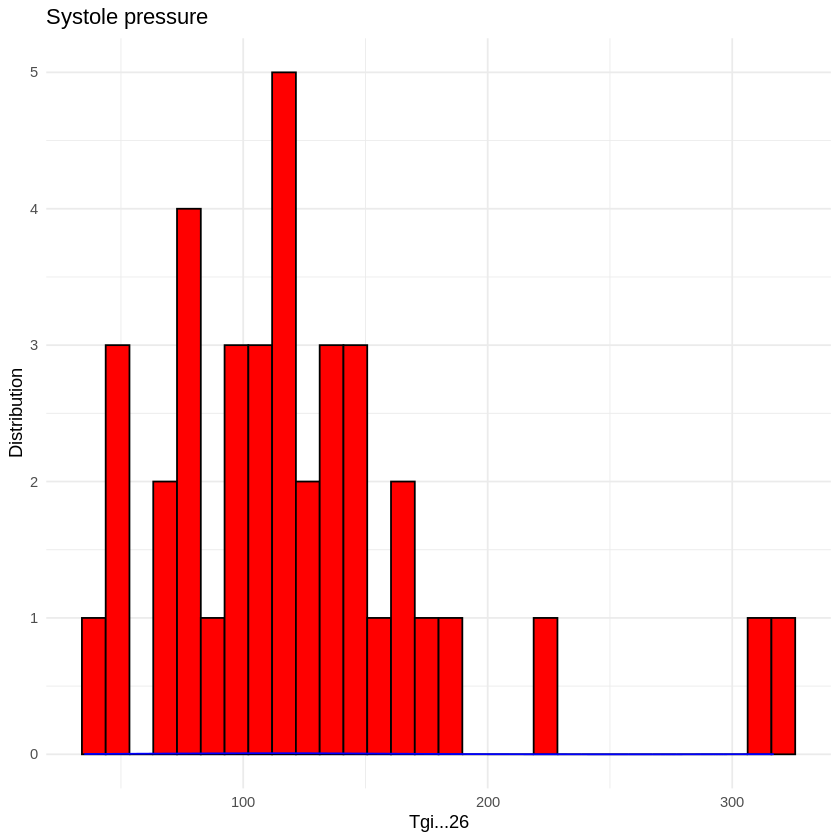

In [16]:
ggplot(meta,aes(Tgi...26)) +
  geom_histogram(color = 'black',fill = 'red') +
  geom_density(color = 'blue') +
  ggtitle('Systole pressure')+
  #scale_x_log10('Logarithm systole pressure') +
  scale_y_continuous('Distribution') +
  theme_minimal()

In [19]:
meta %>%
  mutate(Sys = if_else(abs(Sys) > 160,NA,Sys)) %>%
  dplyr::select(AI,Sys) %>%
  drop_na() %>%
  corr.test()

Call:corr.test(x = .)
Correlation matrix 
       AI   Sys
AI   1.00 -0.02
Sys -0.02  1.00
Sample Size 
[1] 36
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
      AI  Sys
AI  0.00 0.89
Sys 0.89 0.00

 To see confidence intervals of the correlations, print with the short=FALSE option

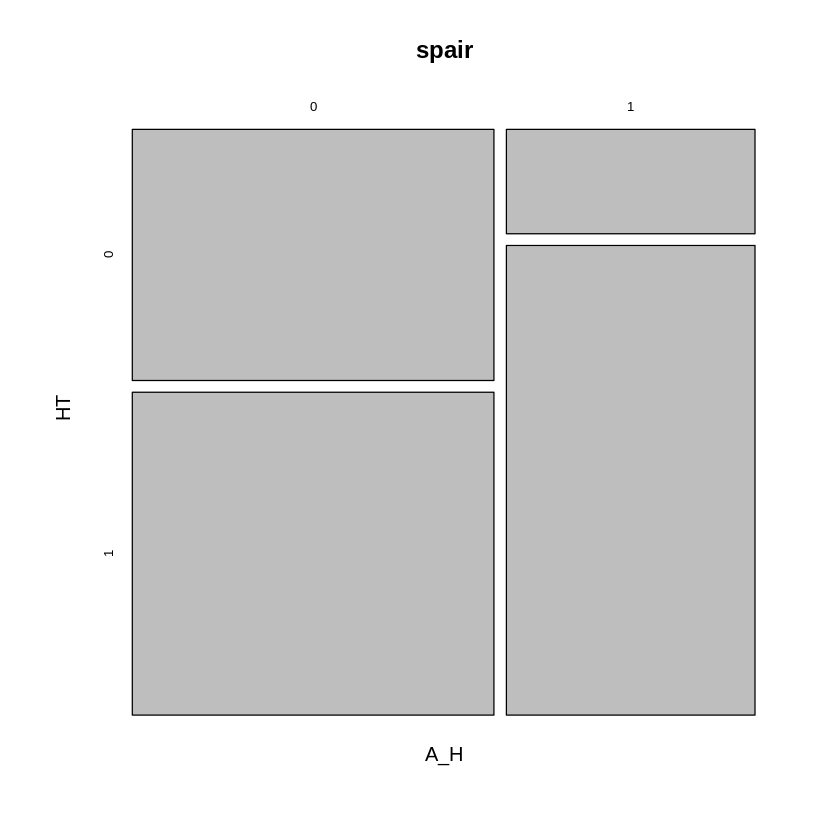

In [20]:
spair <- meta %>% drop_na %>%
  dplyr::select(A_H,HT) %>%
  table()
mosaicplot(spair)

In [21]:
meta %>% drop_na() %>%
  dplyr::select(A_H,HT) %>%
  table() %>%
  addmargins()

,0,1,Sum
0,7,9,16
1,2,9,11
Sum,9,18,27


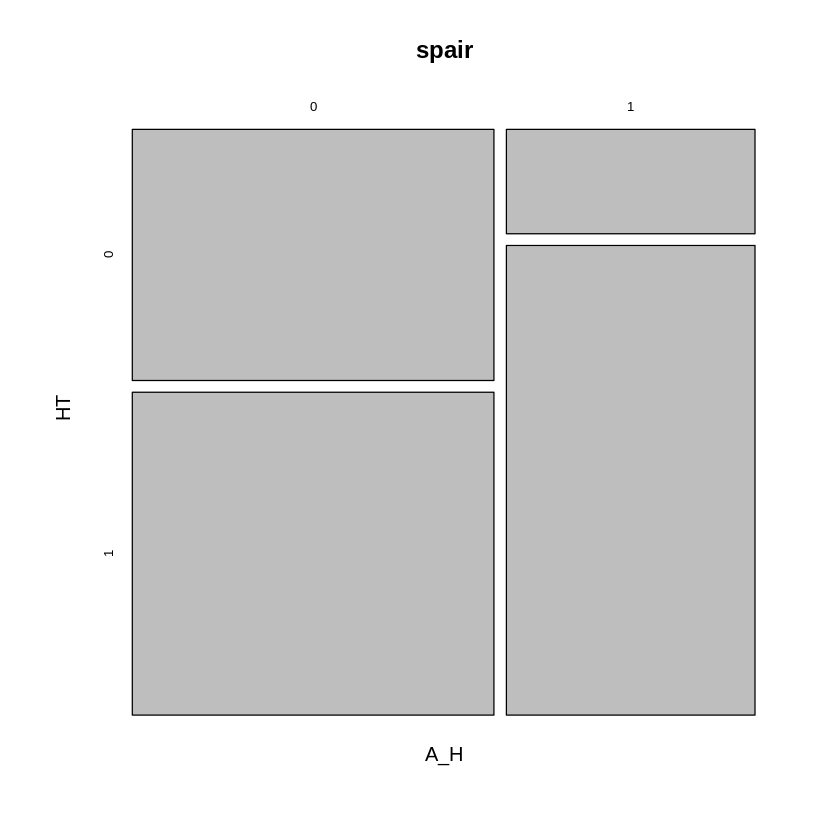

In [22]:
spair2 <- meta %>% drop_na %>%
  dplyr::select(LVH,HT) %>%
  table()

mosaicplot(spair)

In [23]:
wilcox.test(spair,exact = FALSE,paired = FALSE)


	Wilcoxon signed rank test with continuity correction

data:  spair
V = 10, p-value = 0.09751
alternative hypothesis: true location is not equal to 0


In [24]:
fisher.test(spair)


	Fisher's Exact Test for Count Data

data:  spair
p-value = 0.2311
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.4551299 41.6630918
sample estimates:
odds ratio 
  3.343837 


In [25]:
fisher.test(spair2)


	Fisher's Exact Test for Count Data

data:  spair2
p-value = 0.04167
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   0.9093932 485.5948984
sample estimates:
odds ratio 
  9.214734 
